# Laboratorium 7
### *Michał Kurleto*

In [5]:
import numpy as np
import time
from matplotlib import pyplot as plt
import scipy.linalg
from pprint import pprint

## 1. Metoda potęgowa
Napisz funkcję obliczającą metodą potęgową dominującą wartość własną (największą co
do modułu) i odpowiadający jej wektor własny dla danej macierzy rzeczywistej symetrycznej. Sprawdź poprawność działania programu porównując własną implementację
z wynikami funkcji bibliotecznej. Przedstaw na wykresie zależność czasu obliczeń od
rozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...).

In [130]:
def power_method(A, max_iterations=10000, epsilon=1e-8):
    n = A.shape[0]
    x = np.random.uniform(size=(n, 1))
    
    i = 0
    while i < max_iterations:
        x_i = A @ x
        x_i /= np.linalg.norm(x_i)
        
        if np.linalg.norm(x_i - x) < epsilon:
            break
        
        x = x_i
        i += 1
        
    return x.T @ A @ x_i, x / np.linalg.norm(x), i

Funkcja porównuje wyniki mojej implementacji metody potęgowej oraz funkcji bibliotecznej numpy.linalg.eig().

In [144]:
def check_result(A, epsilon=1e-6):
    eig_val_mine, eig_vect_mine, iterations = power_method(A)
    eig_val, eig_vect = np.linalg.eig(A)
    
    max_index = np.argmax(np.absolute(eig_val))
    
    eig_vect = eig_vect[:, max_index]
    eig_val = eig_val[max_index]
    
    for x, y in zip(eig_vect, eig_vect_mine):
        if abs(abs(x) - abs(y)) > epsilon:
            return False
    return abs(abs(eig_val) - abs(eig_val_mine)) < epsilon;

In [145]:
epsilon = 1e-8
for n in range(10, 110, 10):
    A = np.random.randint(low=0, high=10, size=(n, n))
    A = (A + A.T)/2
    if check_result(A):
        print("Corrent for n = {0} and epsilon = {1}".format(n, epsilon))
    else:
        print("Incorrent for n = {0} and epsilon = {1}".format(n, epsilon))

Corrent for n = 10 and epsilon = 1e-08
Corrent for n = 20 and epsilon = 1e-08
Corrent for n = 30 and epsilon = 1e-08
Corrent for n = 40 and epsilon = 1e-08
Corrent for n = 50 and epsilon = 1e-08
Corrent for n = 60 and epsilon = 1e-08
Corrent for n = 70 and epsilon = 1e-08
Corrent for n = 80 and epsilon = 1e-08
Corrent for n = 90 and epsilon = 1e-08
Corrent for n = 100 and epsilon = 1e-08


Jak widać wyniki są zgodne dla różnych wymiarów macierzy

In [114]:
def time_function(func, *args):
    start = time.time()
    func(*args)
    end = time.time()
    return (end - start) * 1000

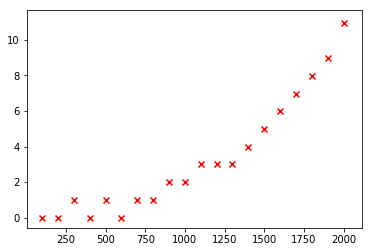

In [127]:
times = []
sizes = [size for size in range(100, 2100, 100)]

for size in sizes:
    A = np.random.randint(low=0, high=10, size=(size, size))
    A = (A + A.T)/2
    times.append(time_function(power_method, A))

for i in range(len(sizes)):
    plt.scatter(sizes[i], times[i], c='red', marker='x')

plt.show()

Wykres czasu potrzebnego na obliczenie wektorów własnych, od wymiarów macierzy.

## 2. Odwrotna metoda potęgowa
Opierając się na twierdzeniu o transformacji widma macierzy oraz wykorzystując metodę potęgową i faktoryzację LU zaimplementuj odwrotną metodę
potęgową pozwalającą na szybkie znalezienie wektorów własnych macierzy A, dla wartości σ bliskich odpowiedniej wartości własnej. Wykorzystaj fakt, że mnożenie wektora xi
przez macierz A−1
(xi+1 = A−1xi) odpowiada rozwiązaniu układu równań Axi+1 = xi.


In [142]:
def inverse_power_method(A, sigma = 0, max_iterations=10000,  epsilon=1e-8):
    n = A.shape[0]
    x = np.random.uniform(size=(n, 1))
    
    LU = scipy.linalg.lu_factor(A - sigma * np.identity(n))
    
    i = 0
    while i < max_iterations:
        x_i = scipy.linalg.lu_solve(LU, x)
        x_i /= np.linalg.norm(x_i)
        
        if np.linalg.norm(x_i - x) < epsilon:
            break
        
        x = x_i
        i += 1
        
    return x_i, i

In [160]:
epsilon = 1e-8
for n in range(10, 110, 10):
    A = np.random.randint(low=0, high=10, size=(n, n))
    A = (A + A.T)/2
    eig_val = power_method(A)[0] 
    
    eig_vect_mine, _ = inverse_power_method(A, eig_val)
    
    eig_val, eig_vect = np.linalg.eig(A)
    max_idx = np.argmax(np.absolute(eig_val))
    eig_vect = eig_vect[:, max_idx]
    eig_vect = eig_vect[:, None]
    
    if np.allclose(np.absolute(eig_vect_mine), np.absolute(eig_vect), epsilon):
        print("Corrent for n = {0} and epsilon = {1}".format(n, epsilon))
    else:
        print("Incorrent for n = {0} and epsilon = {1}".format(n, epsilon))

Corrent for n = 10 and epsilon = 1e-08
Corrent for n = 20 and epsilon = 1e-08
Corrent for n = 30 and epsilon = 1e-08
Corrent for n = 40 and epsilon = 1e-08
Corrent for n = 50 and epsilon = 1e-08
Corrent for n = 60 and epsilon = 1e-08
Corrent for n = 70 and epsilon = 1e-08
Corrent for n = 80 and epsilon = 1e-08
Corrent for n = 90 and epsilon = 1e-08
Corrent for n = 100 and epsilon = 1e-08


Jak widać wyniki mojej implementacji są zgodne z wynikiem otrzymanym przez funkcję numpy.linalg.eig